# Matplotlib: Shared colorbar for all axes

This is something I'm constantly trying to figure out how to do and needed to put this somewhere.


## Method 1: Create new axis for colorbar

- Most control over position.
- You will need to manually make the shared axes have the same scale (vmax, vmin)


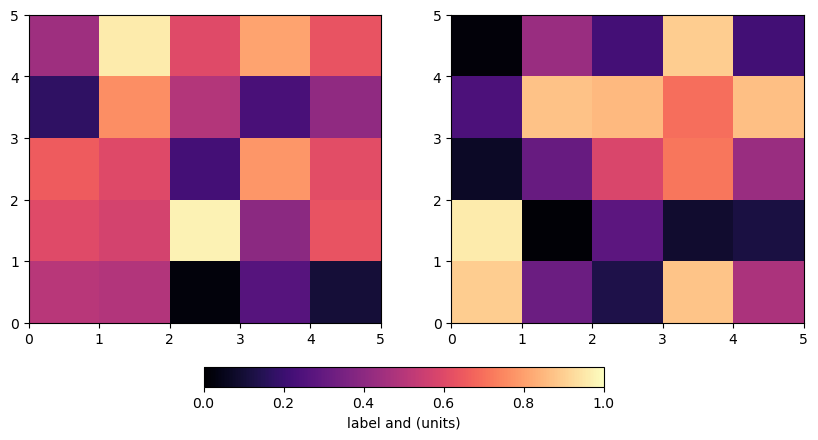

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

data1 = np.random.random([5,5])
data2 = np.random.random([5,5])

fig = plt.figure(1, figsize=[10, 4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
this_plot1 = ax1.pcolormesh(data1, cmap='magma', vmax=1, vmin=0)
this_plot2 = ax2.pcolormesh(data2, cmap='magma', vmax=1, vmin=0)

divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.3, -0.05, 0.4, 0.05]) # [x-pos, y-pos, width, height]
cb = fig.colorbar(this_plot2, cax=cax, orientation='horizontal')
cb.set_label('label and (units)')

## Method 2:

- From Stack Overflow: https://stackoverflow.com/a/13784887/2383070
- Be careful with using `plt.tight_layout()`. In some cases you can't use it, others you can _before_ you add the colorbar.


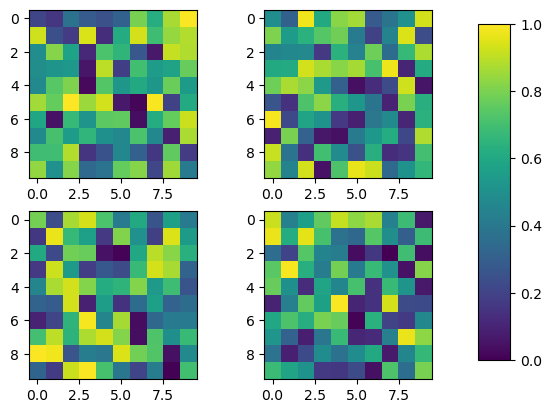

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
# NOTE: Can not use tight_layout here


cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

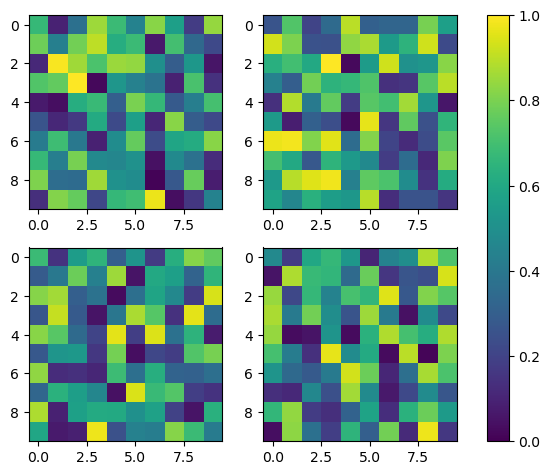

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

plt.tight_layout()

fig.colorbar(im, ax=axes.ravel().tolist())

**Another one from that stake overflow page**

> This is for the more complex case where the values are not just between 0 and 1; the cmap needs to be shared instead of just using the last one.


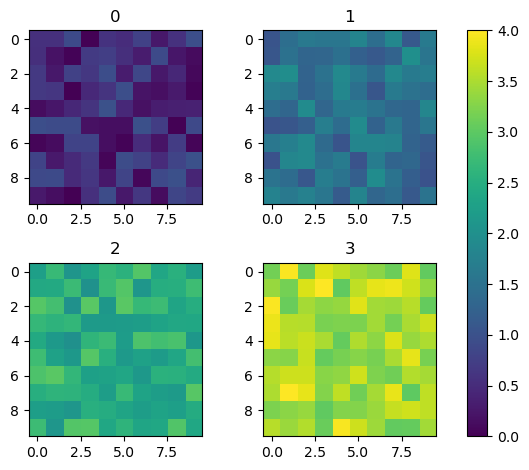

In [4]:
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows=2, ncols=2)
cmap=mpl.colormaps['viridis']
normalizer=Normalize(0,4)
im=cm.ScalarMappable(norm=normalizer)

for i,ax in enumerate(axes.flat):
    ax.imshow(i+np.random.random((10,10)),cmap=cmap,norm=normalizer)
    ax.set_title(str(i))

plt.tight_layout()

fig.colorbar(im, ax=axes.ravel().tolist())


This method uses the `constrained_layout=True` argument when making the subplots which behaves like `tight_layout`.

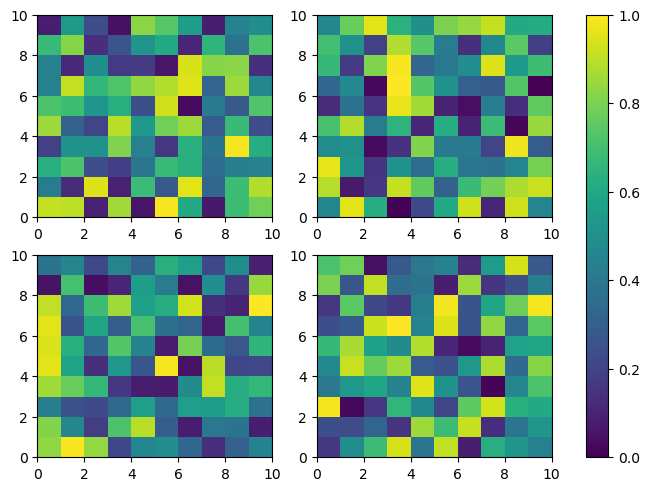

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, constrained_layout=True)
for ax in axes.flat:
    im = ax.pcolormesh(np.random.random((10,10)), vmin=0, vmax=1)

fig.colorbar(im, ax=axes.flat)

# Method 3: Subfigures

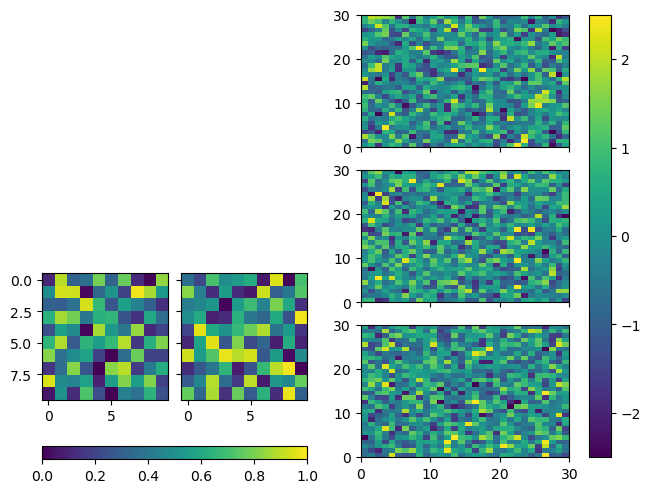

In [6]:
fig = plt.figure(constrained_layout=True)
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2)

axes_l = subfig_l.subplots(nrows=1, ncols=2, sharey=True)
for ax in axes_l:
    im = ax.imshow(np.random.random((10, 10)), vmin=0, vmax=1)

# shared colorbar for left subfigure
subfig_l.colorbar(im, ax=axes_l, location='bottom')

axes_r = subfig_r.subplots(nrows=3, ncols=1, sharex=True)
for ax in axes_r:
    mesh = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)

# shared colorbar for right subfigure
subfig_r.colorbar(mesh, ax=axes_r)

# Cartopy

In [7]:
from toolbox import EasyMap, pc, ccrs

Text(1, 1.3, 'Map of the World')

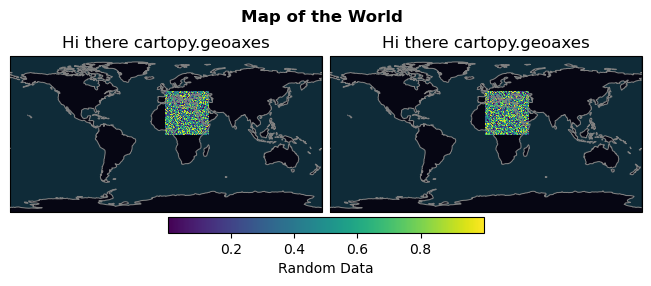

In [8]:
fig, axes = plt.subplots(1,2, subplot_kw=dict(projection=pc), layout="constrained")
for ax in axes:
    EasyMap(ax=ax, dark=True).OCEAN()
    p = ax.pcolormesh(range(50), range(50), np.random.random([50,50]), transform=pc)
    ax.set_global()
    ax.set_title(f"Hi there {ax.name}")
    
fig.colorbar(p, ax=axes, orientation='horizontal', pad=0.01, shrink=.5, label="Random Data")

fig.suptitle("Map of the World", fontweight='bold', y=1.3, x=1, transform=axes[0].transAxes)

Text(1, 1.3, 'Map of the World')

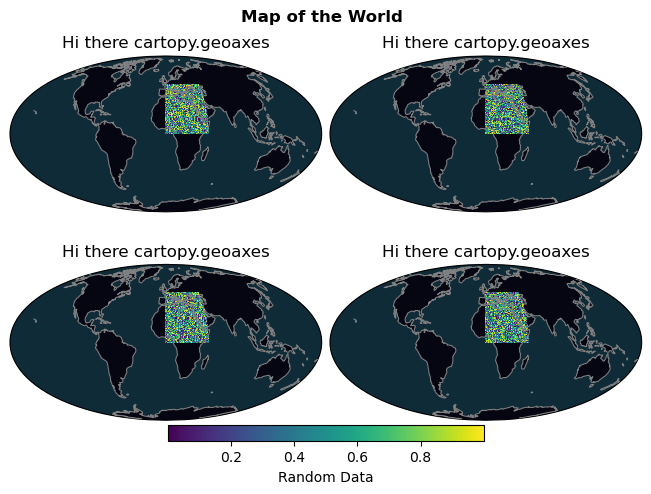

In [13]:
fig, axes = plt.subplots(2,2, subplot_kw=dict(projection=ccrs.Mollweide()), layout="constrained")
axes = axes.flatten()
for ax in axes:
    EasyMap(ax=ax, dark=True).OCEAN()
    p = ax.pcolormesh(range(50), range(50), np.random.random([50,50]), transform=pc)
    ax.set_global()
    ax.set_title(f"Hi there {ax.name}")
    
fig.colorbar(p, ax=axes, orientation='horizontal', pad=0.01, shrink=.5, label="Random Data")

fig.suptitle("Map of the World", fontweight='bold', y=1.3, x=1, transform=axes[0].transAxes)

Text(0.5, 0.98, 'Map of the World')

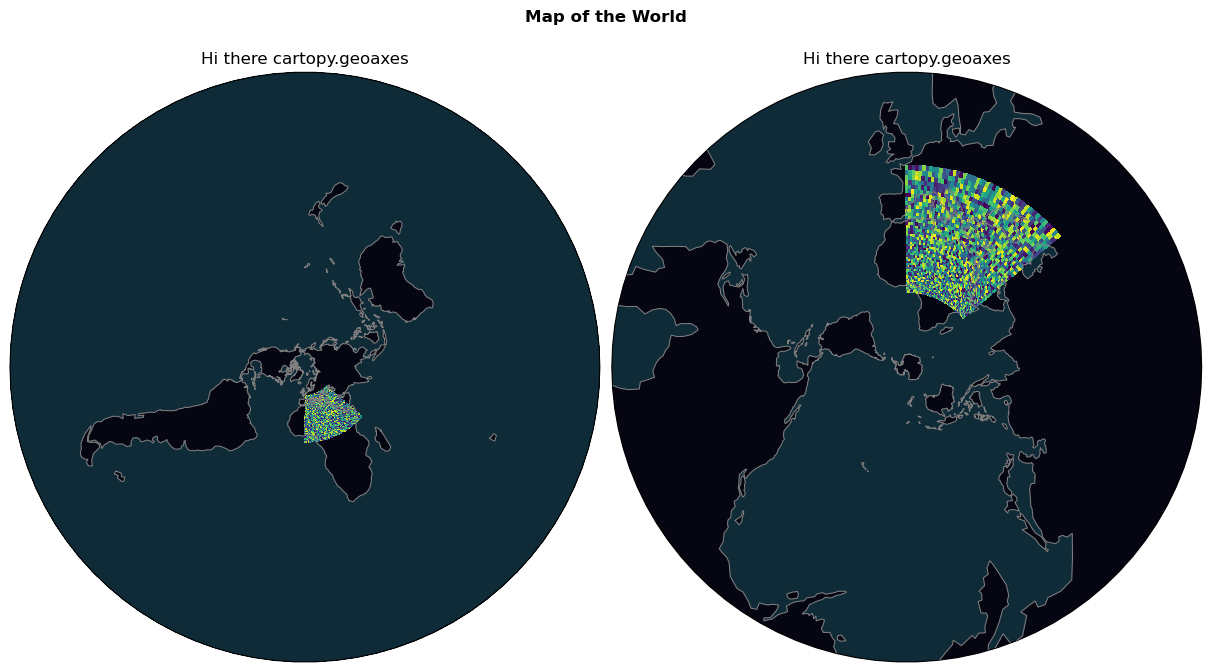

In [14]:
nps = ccrs.NorthPolarStereo()
sps = ccrs.SouthPolarStereo()

fig=plt.figure(figsize=(12,7), layout="constrained")
ax1 = plt.subplot(121, projection=nps)
ax2 = plt.subplot(122, projection=sps)

for ax in [ax1, ax2]:
    EasyMap(ax=ax,dark=True).OCEAN().LAND()
    p = ax.pcolormesh(range(50), range(50), np.random.random([50,50]), transform=pc)
    ax.set_global()
    ax.set_title(f"Hi there {ax.name}")
    
fig.colorbar(p, ax=axes, orientation='horizontal', pad=0.01, shrink=.5, label="Random Data")

fig.suptitle("Map of the World", fontweight='bold')